This notebook is also available on https://github.com/hal2148/adv_prj_in_ml

## Setting Up Data

In [3]:
# import necessary libraries
import pandas as pd
from zipfile import ZipFile
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [5]:
# Load data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [6]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [7]:
y_train_labels.head()

0      Average
1         High
2      Average
3    Very High
4         High
dtype: object

## Bivariate Relationships

I began by exploring the bivariate relationships between available features and the target variable. To do this, I first converted the target variable so that happiness scores were recorded along an ordinal numeric scale (i.e. a score of 'Very Low' would correspond to 0, 'Low' to 1, 'Average' to 2, 'High' to 3, and 'Very High' to 4). I next used boxplots to visualize the distribution of each numeric explanatory feature, grouped by happiness scores. These plots can be seen below, with happiness scores on the y-axis, and feature scores on the x-axis.

### Convert Target Feature to Ordinal Variable, Boxplot Code

In [8]:
# create new ordinal target feature
y_train['Happiness_Score'] = np.where(y_train['Very Low'] == 1, 0,
                            np.where(y_train['Low'] == 1, 1,
                                     np.where(y_train['Average'] == 1, 2,
                                              np.where(y_train['High'] == 1, 3, 4))))

In [9]:
# Add ordinal target feature to X_train
X_train['Happiness_Score'] = y_train['Happiness_Score']
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,Happiness_Score
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000,2
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111,3
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000,2
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333,4
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111,3


In [10]:
# create subset of X_train with just numeric variables
X_train_n = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis = 1)
X_train_n.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,Happiness_Score
0,0.960,1.274,0.854,0.455,0.083,0.027,18.000000,2
1,0.694,1.325,0.835,0.435,0.200,0.127,125.611111,3
2,1.181,1.156,0.999,0.067,0.000,0.034,112.000000,2
3,1.684,1.313,0.871,0.555,0.220,0.167,57.333333,4
4,0.745,1.529,0.756,0.631,0.322,0.240,125.611111,3


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


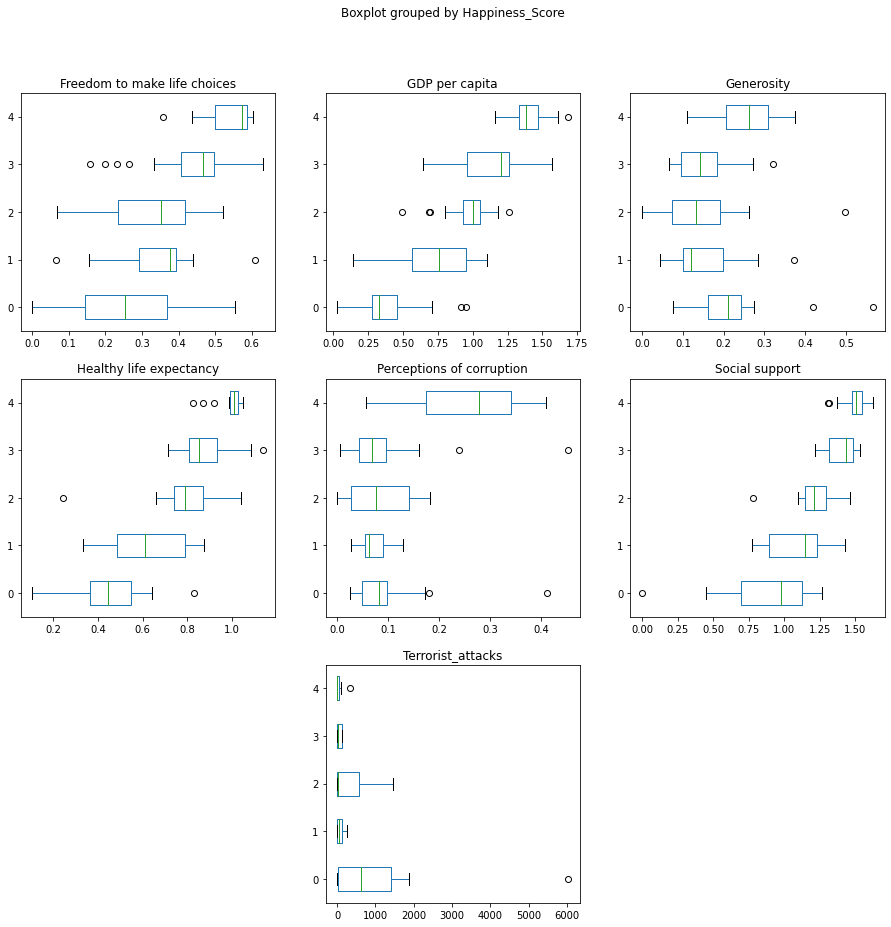

In [11]:
# suppress VisibleDeprecationWarning
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# create plot
fig, axs = plt.subplots(3,3, figsize = (15, 15), sharey = False)
X_train_n.boxplot(by = 'Happiness_Score', vert = False, grid = False, ax = [axs[0,0], axs[0,1], axs[0,2],
                                                              axs[1,0], axs[1,1], axs[1,2],
                                                              axs[2,1]])

# remove unused axes
axs[2,0].remove()
axs[2,2].remove()

# remove subplot xlabels
for ax in fig.get_axes():
  ax.set_xlabel('')
plt.show()

### Numeric Bivariate Relationships

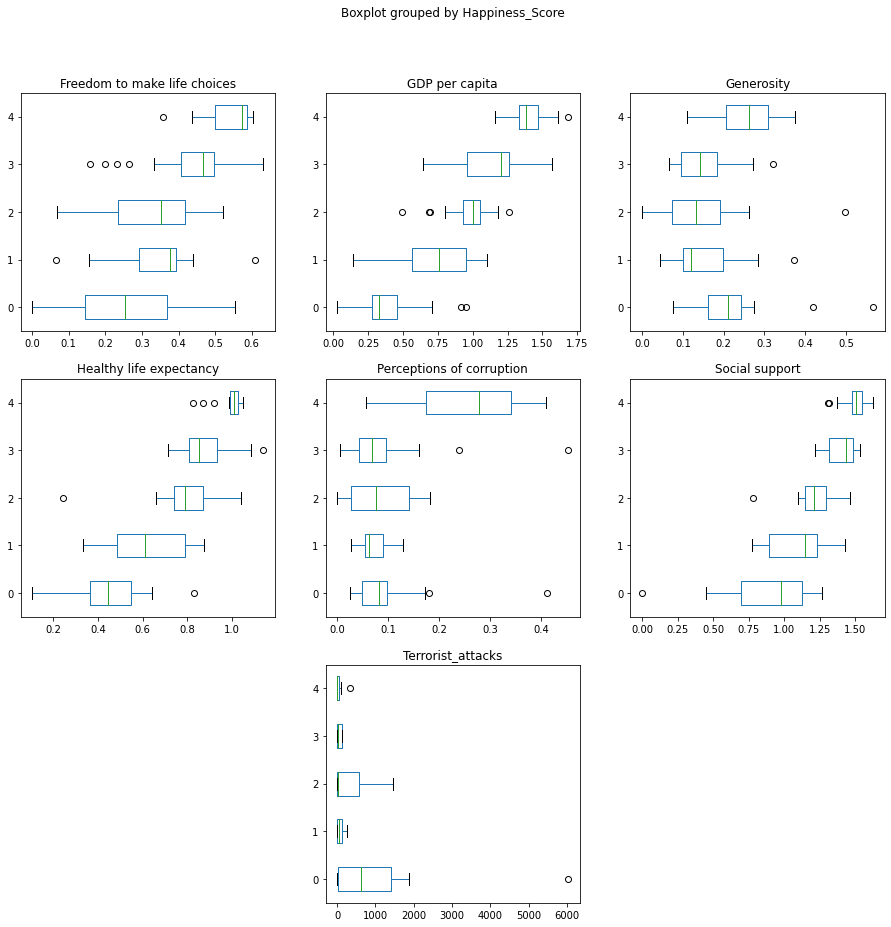

There appear to be generally linear positive correlations between the explanatory features of GDP per capita, healthy life expectancy, social support, and freedom to make life choices, with the target feature. Though there do appear to be relationships between the features of generosity, perceptions of corruption, and even terrorist attacks with the target feature, these relationships appear to be nonlinear in nature.

I next created stacked bar charts to visualize the bivariate relationships between categorical explanatory features and the target feature. Only stacked bar charts for 'region' and 'sub-region' were created - it would obviously be of little value to visualize the distribution of country names by happiness scores, since each country has a unique name.

### Stacked Bar Chart Code

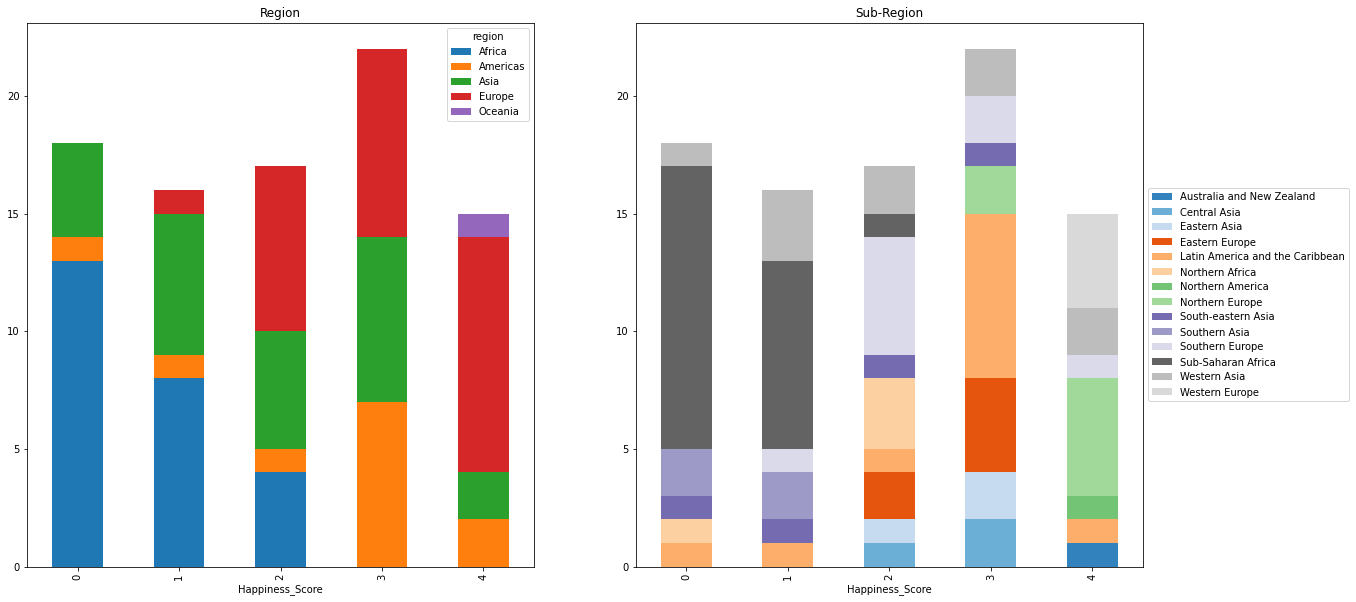

In [12]:
# create plot

colors = plt.cm.GnBu(np.linspace(0, 1, 10))

fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey = False)
X_train.groupby('Happiness_Score')['region'].value_counts().unstack().plot(kind = 'bar', stacked = True, ax = axs[0])
axs[0].set_title('Region')
X_train.groupby('Happiness_Score')['sub-region'].value_counts().unstack().plot(kind = 'bar', stacked = True, ax = axs[1], cmap = 'tab20c')
axs[1].set_title('Sub-Region')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Categorical Bivariate Relationships

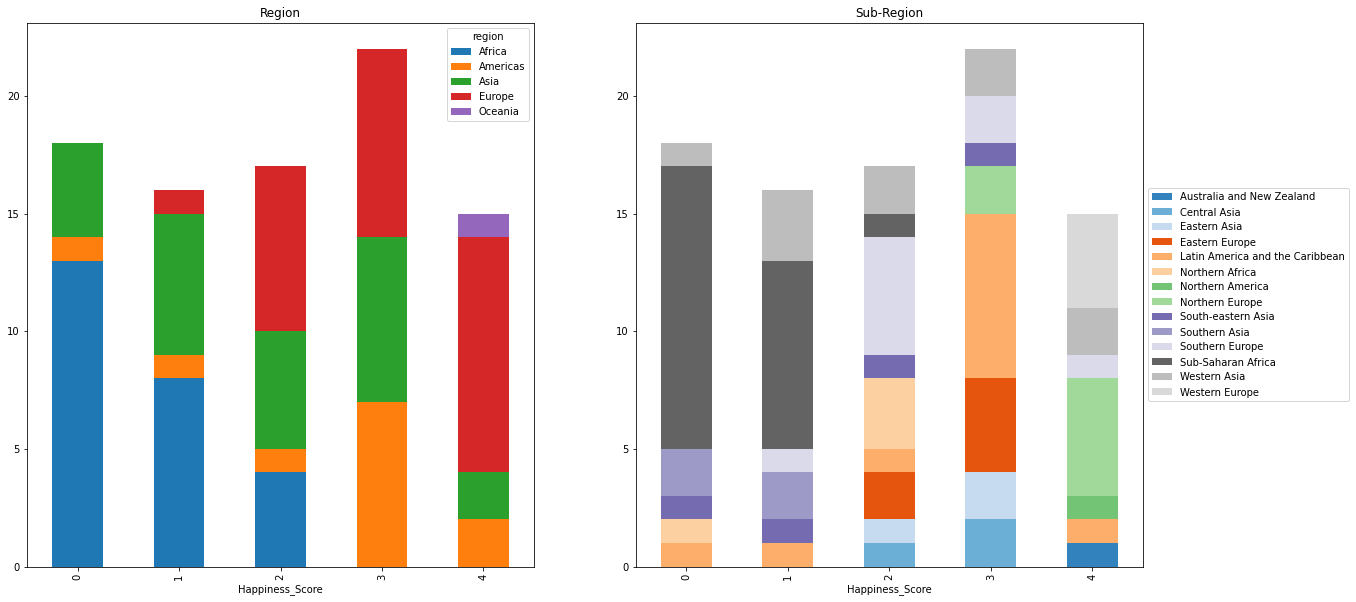

The region that a country is located in appears to have some bearing on its happiness score - countries in Africa, for example, have a score of 'Average' or less; on the other countries in Europe have happiness scores that are almost wholly concentrated in the range of 'Average' and above. Though a country's sub-region also appears to be informative, it is not immediately clear to what extent it provides new information above and beyond a country's larger region.


## Data Preprocessing

I next preprocessed the data in preparation for model-fitting. Numeric features were scaled using StandardScaler(), while categorical features were one hot encoded.

### Preprocessing Code (Manual)

I first preprocessed the X_train data manually (without the use of a pipeline and column transformer) so that it would be easier for me to retain feature names.

In [13]:
# reload data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# recreate subset of X_train with numeric variables
X_train_n = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis = 1)

# fit scaler to X_train_n
scaler = StandardScaler()
scaler.fit(X_train_n)

# transform X_train_n using StandardScaler
X2_train_n = pd.DataFrame(scaler.transform(X_train_n), columns = X_train_n.columns)
X2_train_n.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
0,0.104445,0.206031,0.458311,0.486237,-0.997766,-0.858243,-0.366739
1,-0.543882,0.380595,0.377911,0.357819,0.150055,0.115273,-0.225145
2,0.643092,-0.197863,1.071894,-2.005071,-1.812032,-0.790096,-0.243054
3,1.869063,0.339521,0.530249,1.128327,0.346264,0.504679,-0.314984
4,-0.419579,1.078853,0.043614,1.616315,1.346928,1.215346,-0.225145


In [15]:
# create subset of X_train with categorical variables (less 'country' and 'name')
X_train_c = X_train[['region', 'sub-region']]

# one hot encode categorical variables
X2_train_c = pd.get_dummies(X_train_c)
X2_train_c.head()

,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,sub-region_Australia and New Zealand,sub-region_Central Asia,sub-region_Eastern Asia,sub-region_Eastern Europe,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# concatenate X2_train_n and X2_train_c
X2_train = pd.concat([X2_train_n, X2_train_c], axis = 1)
X2_train.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,0.104445,0.206031,0.458311,0.486237,-0.997766,-0.858243,-0.366739,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.543882,0.380595,0.377911,0.357819,0.150055,0.115273,-0.225145,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0.643092,-0.197863,1.071894,-2.005071,-1.812032,-0.790096,-0.243054,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.869063,0.339521,0.530249,1.128327,0.346264,0.504679,-0.314984,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-0.419579,1.078853,0.043614,1.616315,1.346928,1.215346,-0.225145,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

Next, I fit a Random Forest Classifier with default parameters to the training data and viewed feature importances of the fitted model. Feature importances are sorted in descending order in the below table.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# fit model to training data
model = RandomForestClassifier(random_state = 42)
model.fit(X2_train, y_train_labels)

RandomForestClassifier(random_state=42)

In [18]:
data = {'feature': np.array(X2_train.columns),
        'importance': model.feature_importances_}

feature_sel_rf = pd.DataFrame(data = data)
feature_sel_rf.sort_values('importance', ascending = False)

,feature,importance
0,GDP per capita,0.184428
2,Healthy life expectancy,0.146082
1,Social support,0.134153
3,Freedom to make life choices,0.107648
6,Terrorist_attacks,0.092981
4,Generosity,0.092899
5,Perceptions of corruption,0.088623
23,sub-region_Sub-Saharan Africa,0.024985
10,region_Europe,0.017217
7,region_Africa,0.014020


As expected, though features such as GDP per capita, life expectancy, and social support tended to be more important to predicting a country's happiness score, a country's sub-region in general served as the least important predictor. In fact, whether or not a country was located in the sub-region of Australia and New Zealand was considered an entirely unimportant variable by the random forest model. This suggests that, in general, sub-regions may not be providing much additional information beyond the information already provided by a country's region. Nonetheless, I decided to keep these variables for the time being.

## Model-fitting

I next proceeded to fit models to the data. I began by submitting a Random Forest Classifier with default parameters to the competition to obtain a benchmark score to which tuned models could be later compared.

### Competition and Preprocessing Pipeline Set-up

In [19]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

# Replace missing values with modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit preprocessor object
preprocess=preprocessor.fit(X_train) 

In [32]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [33]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [34]:
# save preproceesor to zip file
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [25]:
# set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

# set apiurl to that of World Happiness Classification Playground
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [26]:
# instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

### Random Forest Model

In [35]:
# fit model to training data
model1 = RandomForestClassifier(random_state = 42)
model1.fit(preprocessor(X_train), y_train_labels)

RandomForestClassifier(random_state=42)

#### Submit Random Forest

In [36]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features there are
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model1 = model_to_onnx(model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model1.onnx", "wb") as f:
    f.write(onnx_model1.SerializeToString())

In [37]:
#Submit Model 1: 

#-- Generate predicted values (model 1)
prediction_labels = model1.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model1.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                   custom_metadata={'team':'8'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 715

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Random Forest Performance

As can be seen from the image below, the model with default parameters performed rather poorly - accurately classifying less than half of the held out test data.

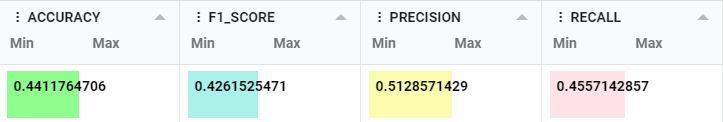

### Gradient Boosting & Support Vector Classifier

I repeated this process with a Gradient Boosting Classifier and a Support Vector Classifier, again using default parameters.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# fit model to training data:
model2 = GradientBoostingClassifier(random_state = 42).fit(preprocessor(X_train), y_train_labels)

In [44]:
from sklearn.svm import SVC

# fit model to training data
model3 = SVC(random_state = 42).fit(preprocessor(X_train), y_train_labels)

#### Submit GBC and SVC



In [45]:
# save GBC as onnx_model2
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model2 = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model2.SerializeToString())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  


In [46]:
# submit model 2: 

#-- Generate predicted values (model 2)
prediction_labels = model2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                   custom_metadata={'team':'8'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 722

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [47]:
# save SVC as onnx_model3
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model3 = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model3.onnx", "wb") as f:
    f.write(onnx_model3.SerializeToString())

In [48]:
# submit model 3: 

#-- Generate predicted values (model 3)
prediction_labels = model3.predict(preprocessor(X_test))

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                   custom_metadata={'team':'8'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 724

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### GBC and SVC Performance

The evaluation metrics of the GBC are picture first, followed by the metrics for the SVC. With default parameters, the GBC matched the Random Forest Classifier's accuracy and recall scores, but attained better f1-score and precision metrics. On the other hand, the SVC outperformed the GBC on all metrics save for precision (though it still beat the Random Forest Classifier's precision score).

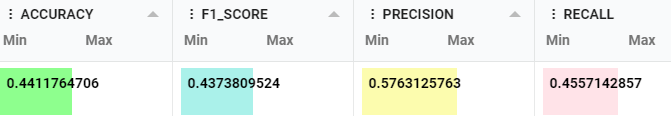

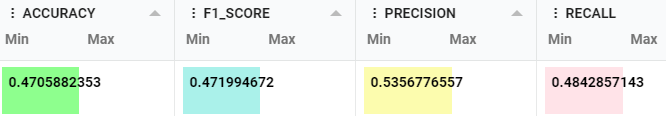

### SVC Model Tuning

Since the SVC model with default parameters performed the best, I decided to try and tune the model's hyperparameters using GridSearchCV to see if I could increase performance.

In [58]:
from sklearn.model_selection import GridSearchCV


# generate a range of values 2**-5, 2**-1, ... 2**15 to test for C and gamma
# based on recommendation from https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
exp = np.arange(-5, 16, 2)
param_range = []
for n in exp:
  param_range.append(2.0**n)

# define parametric grid for GridSearchCV
param_grid = {
    'C' : param_range,
    'gamma' : param_range,
    'kernel' : ['rbf', 'poly', 'sigmoid']
}

# instantiate GridSearchCV and fit to training data
svc_grid = GridSearchCV(SVC(random_state = 42), param_grid, cv = 10)
svc_grid.fit(preprocessor(X_train), y_train_labels)

print("best GridSearchCV svc cross-validation score: " + str(svc_grid.best_score_))
print("best GridSearchCV svc parameters: " + str(svc_grid.best_params_))

best GridSearchCV svc cross-validation score: 0.7166666666666667
best GridSearchCV svc parameters: {'C': 8.0, 'gamma': 0.03125, 'kernel': 'rbf'}


In [59]:
# fit SVC to training data using best parameters
model4 = SVC(C = 8, gamma = 0.03125, kernel = 'rbf', random_state = 42).fit(preprocessor(X_train), y_train_labels)

#### Submit Tuned SVC Model

In [60]:
# save SVC as onnx_model4
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model4 = model_to_onnx(model4, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model4.onnx", "wb") as f:
    f.write(onnx_model4.SerializeToString())

In [61]:
# submit model 4: 

#-- Generate predicted values (model 4)
prediction_labels = model4.predict(preprocessor(X_test))

# Submit Model 4 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model4.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                   custom_metadata={'team':'8'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 751

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Tuned SVC Performance

As can be seen from the image below, the tuned SVC model attained the highest accuracy, f1-scores, and recall scores among the models tested thus far. However, the GBC with default parameters performed slightly better on precision.

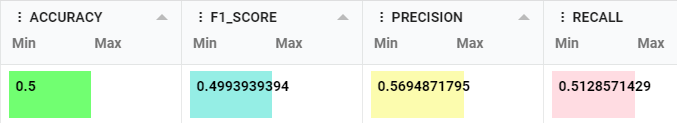


The below table summarizes the differences in hyperparameters used for the tuned and the untuned SVC models.

In [101]:
# Compare untuned and tuned SVC models
data=mycompetition.compare_models([751], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_751
0,C,1.000000,8
1,break_ties,False,False
2,cache_size,200,200
3,class_weight,None,None
4,coef0,0.000000,0.000000
5,decision_function_shape,ovr,ovr
6,degree,3,3
7,gamma,scale,0.031250
8,kernel,rbf,rbf
9,max_iter,-1,-1


### GBC Model Tuning

Since the GBC with default parameters also performed fairly well, I decided to see if tuning hyperparameters for that model would allow for even better scores than that achieved thus far. I did this again using GridSearchCV.

In [93]:
# define parametric grid for GridSearchCV
param_grid = {
    'n_estimators' : [80, 90, 100],
    'max_depth' : [1, 3],
    'min_samples_leaf' : [1, 2, 3]
}

# instantiate GridSearchCV and fit to training data
gbc_grid = GridSearchCV(GradientBoostingClassifier(random_state = 42), param_grid, cv = 10)
gbc_grid.fit(preprocessor(X_train), y_train_labels)

print("best GridSearchCV gbc cross-validation score: " + str(gbc_grid.best_score_))
print("best GridSearchCV gbc parameters: " + str(gbc_grid.best_params_))

best GridSearchCV gbc cross-validation score: 0.6513888888888889
best GridSearchCV gbc parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 80}


In [94]:
# fit gbc to training data using best parameters
model5 = GradientBoostingClassifier(n_estimators = 80, min_samples_leaf = 3, max_depth = 3, random_state = 42)
model5.fit(preprocessor(X_train), y_train_labels)

GradientBoostingClassifier(min_samples_leaf=3, n_estimators=80, random_state=42)

#### Submit Tuned GBC

In [95]:
# save gbc as onnx_model5
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model5 = model_to_onnx(model5, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model5.onnx", "wb") as f:
    f.write(onnx_model5.SerializeToString())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  


In [96]:
# submit model 5: 

#-- Generate predicted values (model 5)
prediction_labels = model5.predict(preprocessor(X_test))

# Submit Model 5 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model5.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                   custom_metadata={'team':'8'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 856

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Tuned GBC Performance

Interestingly, the tuned GBC performed worse than all the models tested thus far.

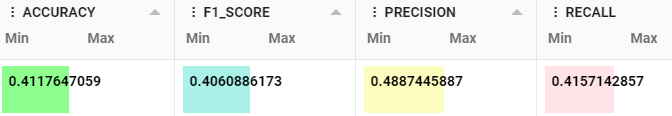

The below table summarizes the differences in hyperparameters used for the tuned and the untuned GBC models.

In [99]:
# Compare untuned and tuned gbc models
data=mycompetition.compare_models([856], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_856
0,ccp_alpha,0.000000,0.000000
1,criterion,friedman_mse,friedman_mse
2,init,None,None
3,learning_rate,0.100000,0.100000
4,loss,deviance,deviance
5,max_depth,3,3
6,max_features,None,None
7,max_leaf_nodes,None,None
8,min_impurity_decrease,0.000000,0.000000
9,min_samples_leaf,1,3


### Multi-Layer Perceptron Model

Finally, I also tested a MLP model to see if deep learning methods would outperform the models used thus far. I used a neural network with two hidden layers, each with 26 hidden neurons.

In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# lower the learning rate of the SGD optimizer
sgd = SGD(lr = 0.005)

#count features in input data
feature_count=preprocessor(X_train).shape[1] 

# instantiate neural network with two hidden layers
model6 = Sequential()
model6.add(Dense(26, input_dim=feature_count, activation='relu'))
model6.add(Dense(26, activation = 'relu'))

model6.add(Dense(5, activation='softmax')) 
                                            
# compile model
model6.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

# instantiate an early stopping callback function
# that will stop model training when there is an increase in val_loss
from tensorflow.keras import callbacks
stopping = callbacks.EarlyStopping(monitor ="val_loss",
                                   mode ="min",
                                   patience = 100,
                                   restore_best_weights = True)

# fit the model to the data
model6.fit(preprocessor(X_train), y_train,
               batch_size = 32, 
               epochs = 5000, validation_split=0.2,
                callbacks = [stopping])  

Epoch 1/5000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 138ms/step - loss: 1.6187 - accuracy: 0.1857 - val_loss: 1.5904 - val_accuracy: 0.2778
Epoch 2/5000
3/3 [==============================] - 0s 20ms/step - loss: 1.6133 - accuracy: 0.1857 - val_loss: 1.5867 - val_accuracy: 0.2778
Epoch 3/5000
3/3 [==============================] - 0s 19ms/step - loss: 1.6072 - accuracy: 0.2143 - val_loss: 1.5824 - val_accuracy: 0.2778
Epoch 4/5000
3/3 [==============================] - 0s 31ms/step - loss: 1.6011 - accuracy: 0.2143 - val_loss: 1.5792 - val_accuracy: 0.2778
Epoch 5/5000
3/3 [==============================] - 0s 33ms/step - loss: 1.5955 - accuracy: 0.2143 - val_loss: 1.5749 - val_accuracy: 0.2778
Epoch 6/5000
3/3 [==============================] - 0s 35ms/step - loss: 1.5891 - accuracy: 0.2429 - val_loss: 1.5717 - val_accuracy: 0.2778
Epoch 7/5000
3/3 [==============================] - 0s 23ms/step - loss: 1.5818 - accuracy: 0.2429 - val_loss: 1.5676 - val_accuracy: 0.3333
Epoch 8/5000
3/3 [=======

#### Submit MLP Model

In [106]:
# Save model6 to onnx file 
onnx_model6 = model_to_onnx(model6, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model6.onnx", "wb") as f:
    f.write(onnx_model6.SerializeToString())

In [107]:
# submit model 6: 

# generate predicted y values
prediction_column_index=model6.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# submit model 6 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model6.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata={'team':'8'})

3/3 [==============================] - 0s 4ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 860

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### MLP Model Performance

The MLP neural network attained the same accuracy score as the tuned SVC model, and also outperformed the latter model on precision and recall. However, the tuned SVC model had a better f1-score.

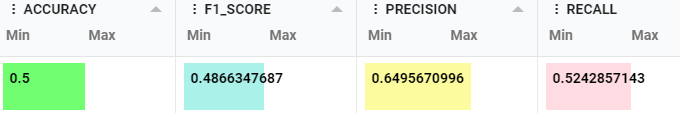

## Conclusion

In this notebook I attempted to predict a country's happiness score in the UN World Happiness Ranking using Random Forest Classifiers, Gradient Boosting Classifiers, Support Vector Classifiers, and Multi-Layer Perceptron neural networks. By tuning hyperparameters using cross-validation, I was able to improve the performance of my Random Forest model, though my tuned Gradient Boosting Classifier performed worse on test data than the model with default parameters. The MLP neural network I trained performed similarly to the tuned SVC. Further efforts to improve prediction performance could include refining the training data using feature engineering and selection techniques.